<a href="https://colab.research.google.com/github/valentinpylypchuk/AAA-ML-Project-2025-26/blob/main/Project_Final_Submission_Isaza_Pylypchuk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Customer Personality Analysis project focuses on understanding the characteristics and behaviors of a company’s ideal customers. The goal of this analysis is to segment customers based on their purchasing habits, preferences, and demographic attributes, in order to help the company tailor its marketing strategies and product offerings to specific groups.

The dataset provides various customer-related features such as demographics, spending patterns, and product preferences. By analyzing these attributes, we aim to identify distinct customer segments and determine which profiles are most likely to respond to specific marketing campaigns or purchase particular products.

Link: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

# Libraries

In [73]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import torch
import torch.nn as nn

# Dataset Load and understanding

In [ ]:
#Importing dataset
url = "https://raw.githubusercontent.com/valentinpylypchuk/AAA-ML-Project-2025-26/refs/heads/main/marketing_campaign.csv"
data = pd.read_csv(url, sep='\t')
data_backup = data.copy()
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0



Description of all the columns the dataset includes:
###  People
- **ID**: Customer's unique identifier  
- **Year_Birth**: Customer's birth year  
- **Education**: Customer's education level  
- **Marital_Status**: Customer's marital status  
- **Income**: Customer's yearly household income  
- **Kidhome**: Number of children in customer's household  
- **Teenhome**: Number of teenagers in customer's household  
- **Dt_Customer**: Date of customer's enrollment with the company  
- **Recency**: Number of days since customer's last purchase  
- **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise  


###  Products
- **MntWines**: Amount spent on wine in the last 2 years  
- **MntFruits**: Amount spent on fruits in the last 2 years  
- **MntMeatProducts**: Amount spent on meat in the last 2 years  
- **MntFishProducts**: Amount spent on fish in the last 2 years  
- **MntSweetProducts**: Amount spent on sweets in the last 2 years  
- **MntGoldProds**: Amount spent on gold in the last 2 years  



###  Promotion
- **NumDealsPurchases**: Number of purchases made with a discount  
- **AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
- **AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
- **AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
- **AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
- **AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
- **Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise  


###  Place
- **NumWebPurchases**: Number of purchases made through the company’s website  
- **NumCatalogPurchases**: Number of purchases made using a catalogue  
- **NumStorePurchases**: Number of purchases made directly in stores  
- **NumWebVisitsMonth**: Number of visits to the company’s website in the last month  


Now we verify size of the dataset and the data types.

In [ ]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Data cleaning

Check of duplicated values and misisng values.

In [ ]:
#checking duplicated data
print(data.duplicated().sum())
#checking missing value
print(data.isnull().sum())
#Proportion of missing values
print("Percentage of missing values in column income: ", data['Income'].isna().sum() / len(data) * 100)


0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64
Percentage of missing values in column income:  1.0714285714285714


Given that only one column has missing values, and the amount of missing values is approximately one percent of samples, we decide to simply drop missing values.

In [ ]:
#remove missing value
data = data.dropna()

Now, since we have a column which contains date time, we standarize the format using `pd.to_datetime` to properly perform data exploration.

In [ ]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
print(data['Dt_Customer'].dtypes)

datetime64[ns]


 It will result useful for the next part defining new columns based on the already existing ones. It is also included the renaming of variables for better clarity of the dataset.

In [ ]:
#Defining Age from Year_Birth and current year
data['Age']=2015-data['Year_Birth']
#Defining months since enrollement
data['Months_since_enrollement'] = 12.0 * (2015 - data.Dt_Customer.dt.year ) + (1 - data.Dt_Customer.dt.month)
#Defining total amount spent
data['Total_mnt']=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']

In [ ]:
#Renaming variables
data=data.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})
data['Marital_Status']=data['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})
data['Education']=data['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})
data['Children']=data['Kidhome']+data['Teenhome']
data['Has_child'] = np.where(data.Children> 0, 'Has child', 'No child')
data['Children'].replace({3: "3 children",2:'2 children',1:'1 child',0:"No child"},inplace=True)
data=data.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

#Visualizating modified dataset
print(data.head(5))
print(data.info())

     ID  Year_Birth     Education Marital_Status  Income  Kidhome  Teenhome  \
0  5524        1957  Postgraduate          Alone   58138        0         0   
1  2174        1954  Postgraduate          Alone   46344        1         1   
2  4141        1965  Postgraduate      In couple   71613        0         0   
3  6182        1984  Postgraduate      In couple   26646        1         0   
4  5324        1981  Postgraduate      In couple   58293        1         0   

  Dt_Customer  Recency  Wines  ...  AcceptedCmp2  Complain  Z_CostContact  \
0  2012-09-04       58    635  ...             0         0              3   
1  2014-03-08       38     11  ...             0         0              3   
2  2013-08-21       26    426  ...             0         0              3   
3  2014-02-10       26     11  ...             0         0              3   
4  2014-01-19       94    173  ...             0         0              3   

   Z_Revenue  Response  Age  Months_since_enrollement  Total_m

/tmp/ipython-input-3689182304.py:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





# Univariate analysis

For this part, we are going to analyse each variable separetely, including distribution and outlier detection. First we will work on numeric variables and then on categorical variables.

In [ ]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:")
print(numeric_cols)

Numeric columns:
Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'Web',
       'Catalog', 'Store', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
       'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Months_since_enrollement', 'Total_mnt'],
      dtype='object')


First, we will analyse the income variable. We can begin by make basic statistics measures like mean, variance, etc. In addition, we will calculate the skew and kurtosis to get a better understanding of the variable.

In [ ]:
print(data['Income'].describe())
#skewness
print(data['Income'].skew())
#kurtosis
print(data['Income'].kurtosis())

count     2216
mean     52247
std      25173
min       1730
25%      35303
50%      51382
75%      68522
max     666666
Name: Income, dtype: float64
6.7634873728111184
159.63669957780044


Based on the statistical measures obtained, we can see that mean and median values are very similar. However, our max value is very high (666k $), which is a sign of outlier presence. Furthermore, the skewness value, 6.76, is very high, as well as the kurtosis value, 159.6. These values confirm the presence of outliers, as they are very high.

In [ ]:
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Income'] < lower_bound) | (data['Income'] > upper_bound)]
print(len(outliers), "outliers detected")

8 outliers detected


In [ ]:
data_no_outliers = data[(data['Income'] >= lower_bound) & (data['Income'] <= upper_bound)]

We make all the calculations again.

In [ ]:
print(data_no_outliers['Income'].describe())
#skewness
print(data_no_outliers['Income'].skew())
#kurtosis
print(data_no_outliers['Income'].kurtosis())

count     2208
mean     51634
std      20713
min       1730
25%      35196
50%      51301
75%      68290
max     113734
Name: Income, dtype: float64
0.0129908810197235
-0.847961943269187


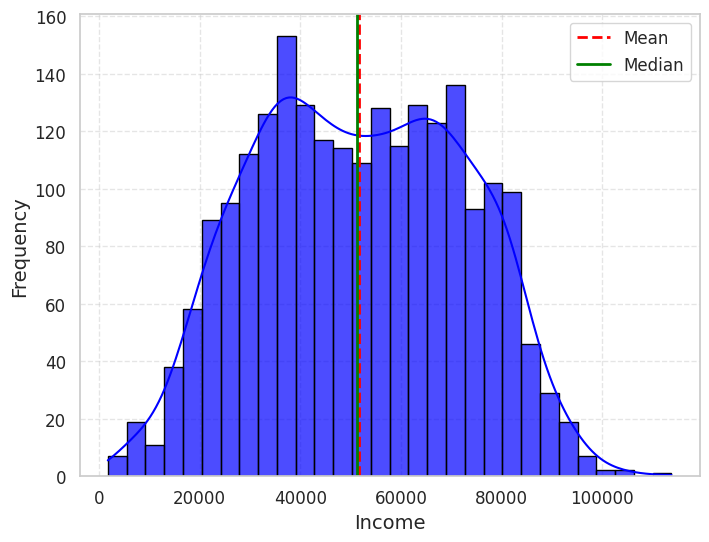

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(
    data_no_outliers['Income'],
    bins=30,
    kde=True,
    color='blue',
    edgecolor='black',
    alpha=0.7
)

# Lines for average and mean
plt.axvline(data_no_outliers['Income'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(data_no_outliers['Income'].median(), color='green', linestyle='-', linewidth=2, label='Median')

plt.xlabel('Income', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

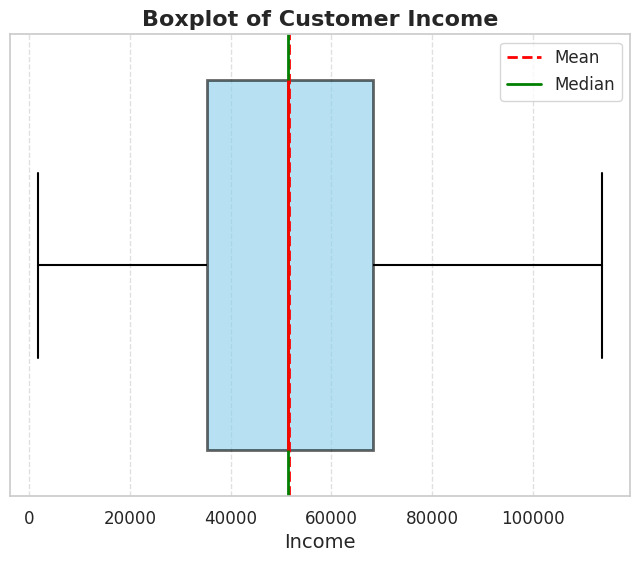

In [ ]:
plt.figure(figsize=(8,6))

# Advanced boxplot using Seaborn
sns.boxplot(
    x=data_no_outliers['Income'],
    color='lightblue',
    fliersize=5,          # size of outlier markers
    linewidth=2,          # line thickness
    boxprops=dict(facecolor='skyblue', alpha=0.6, edgecolor='black'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.5),
    capprops=dict(color='black', linewidth=1.5)
)

# Add title and labels
plt.title('Boxplot of Customer Income', fontsize=16, weight='bold')
plt.xlabel('Income', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Add mean and annotations
mean_val = data_no_outliers['Income'].mean()
median_val = data_no_outliers['Income'].median()

# Lines for average and mean
plt.axvline(data_no_outliers['Income'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(data_no_outliers['Income'].median(), color='green', linestyle='-', linewidth=2, label='Median')

plt.legend()
plt.show()

We repeat the analysis, but with the age column.

In [ ]:
print(data_no_outliers['Age'].describe())
#skewness
print(data_no_outliers['Age'].skew())
#kurtosis
print(data_no_outliers['Age'].kurtosis())

count   2208
mean      46
std       12
min       19
25%       38
50%       45
75%       56
max      122
Name: Age, dtype: float64
0.35006548981516367
0.7343770546461013


We see that the max for age is 122, which is either an error or a very isolated case, thus we procceed to delete the sample over 100.

In [ ]:
data_no_outliers = data_no_outliers[(data_no_outliers['Age'] < 100)]

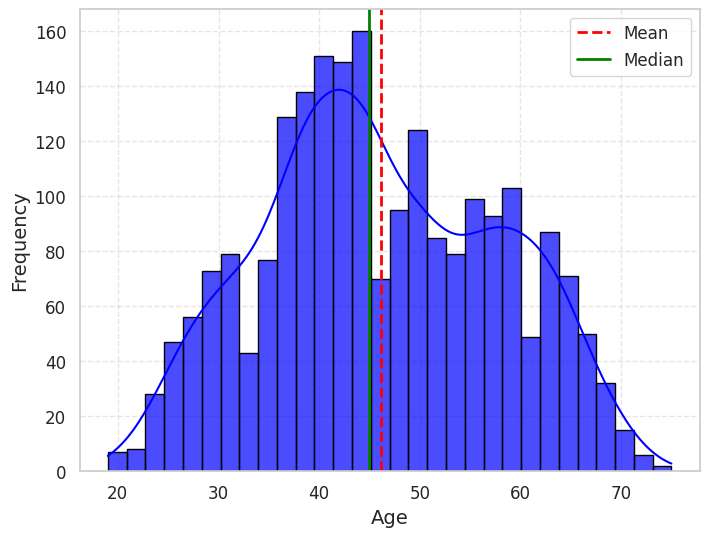

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(
    data_no_outliers['Age'],
    bins=30,
    kde=True,
    color='blue',
    edgecolor='black',
    alpha=0.7
)

# Lines for average and mean
plt.axvline(data_no_outliers['Age'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(data_no_outliers['Age'].median(), color='green', linestyle='-', linewidth=2, label='Median')

plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

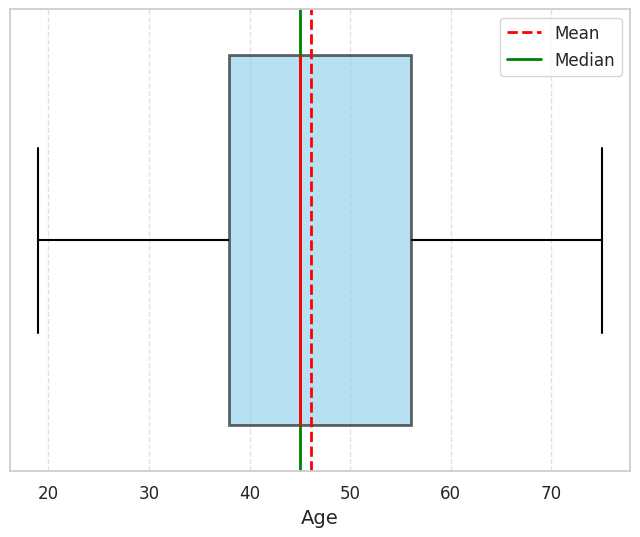

In [ ]:
plt.figure(figsize=(8,6))

# Advanced boxplot using Seaborn
sns.boxplot(
    x=data_no_outliers['Age'],
    color='lightblue',
    fliersize=5,          # size of outlier markers
    linewidth=2,          # line thickness
    boxprops=dict(facecolor='skyblue', alpha=0.6, edgecolor='black'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.5),
    capprops=dict(color='black', linewidth=1.5)
)

# Add labels
plt.xlabel('Age', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Add mean and annotations
mean_val = data_no_outliers['Age'].mean()
median_val = data_no_outliers['Age'].median()

# Lines for average and mean
plt.axvline(data_no_outliers['Age'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(data_no_outliers['Age'].median(), color='green', linestyle='-', linewidth=2, label='Median')

plt.legend()
plt.show()

Now, we repeat the same process with `Months_since_enrollement
`and `Total_mnt`

In [ ]:
print(data_no_outliers['Months_since_enrollement'].describe())
#skewness
print(data_no_outliers['Months_since_enrollement'].skew())
#kurtosis
print(data_no_outliers['Months_since_enrollement'].kurtosis())

count   2205
mean      18
std        7
min        7
25%       13
50%       18
75%       24
max       30
Name: Months_since_enrollement, dtype: float64
-0.015477008799926795
-1.2008668683167605


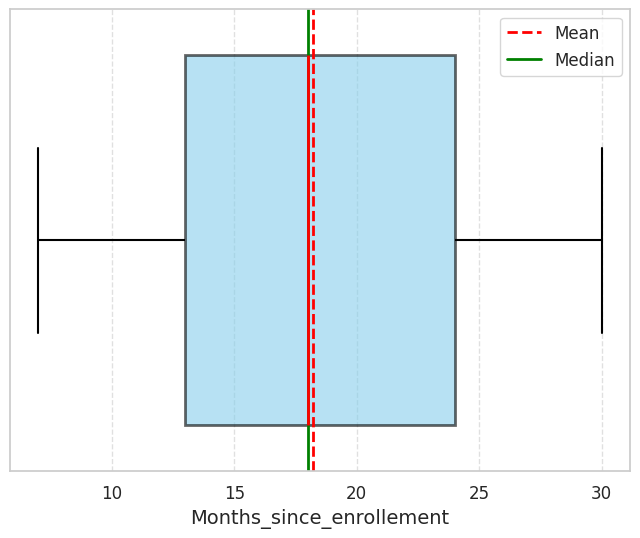

In [ ]:
plt.figure(figsize=(8,6))

# Advanced boxplot using Seaborn
sns.boxplot(
    x=data_no_outliers['Months_since_enrollement'],
    color='lightblue',
    fliersize=5,          # size of outlier markers
    linewidth=2,          # line thickness
    boxprops=dict(facecolor='skyblue', alpha=0.6, edgecolor='black'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.5),
    capprops=dict(color='black', linewidth=1.5)
)

# Add labels
plt.xlabel('Months_since_enrollement', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Add mean and annotations
mean_val = data_no_outliers['Months_since_enrollement'].mean()
median_val = data_no_outliers['Months_since_enrollement'].median()

# Lines for average and mean
plt.axvline(data_no_outliers['Months_since_enrollement'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(data_no_outliers['Months_since_enrollement'].median(), color='green', linestyle='-', linewidth=2, label='Median')

plt.legend()
plt.show()

In [ ]:
print(data_no_outliers['Total_mnt'].describe())
#skewness
print(data_no_outliers['Total_mnt'].skew())
#kurtosis
print(data_no_outliers['Total_mnt'].kurtosis())

count   2205
mean     607
std      602
min        5
25%       69
50%      397
75%     1047
max     2525
Name: Total_mnt, dtype: float64
0.8595515180247321
-0.3350656242349701


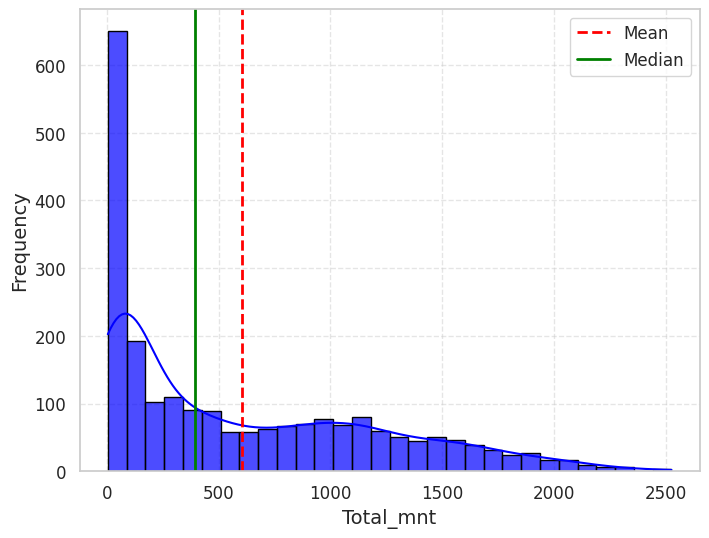

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(
    data_no_outliers['Total_mnt'],
    bins=30,
    kde=True,
    color='blue',
    edgecolor='black',
    alpha=0.7
)

# Lines for average and mean
plt.axvline(data_no_outliers['Total_mnt'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(data_no_outliers['Total_mnt'].median(), color='green', linestyle='-', linewidth=2, label='Median')

plt.xlabel('Total_mnt', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

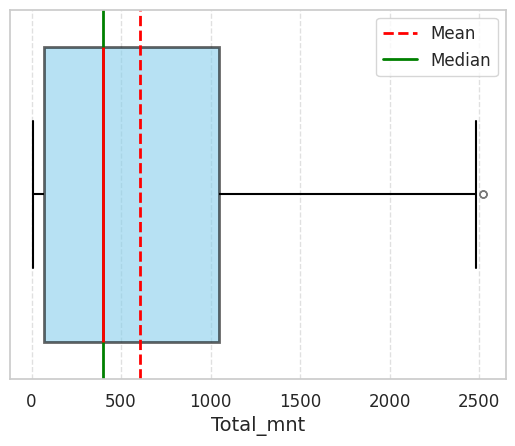

In [ ]:
# boxplot using Seaborn
sns.boxplot(
    x=data_no_outliers['Total_mnt'],
    color='lightblue',
    fliersize=5,          # size of outlier markers
    linewidth=2,          # line thickness
    boxprops=dict(facecolor='skyblue', alpha=0.6, edgecolor='black'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.5),
    capprops=dict(color='black', linewidth=1.5)
)

# Add labels
plt.xlabel('Total_mnt', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Add mean and annotations
mean_val = data_no_outliers['Total_mnt'].mean()
median_val = data_no_outliers['Total_mnt'].median()

# Lines for average and mean
plt.axvline(data_no_outliers['Total_mnt'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.axvline(data_no_outliers['Total_mnt'].median(), color='green', linestyle='-', linewidth=2, label='Median')

plt.legend()
plt.show()

After analysing numerical variables, we can move own to do the univariate analysis of categorical values. For this part, we will work with marital status, education level and child status.

               Frequency  Percentage (%)
Education                               
Postgraduate        1953              89
Undergraduate        252              11


/tmp/ipython-input-2346799259.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-2346799259.py:26: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



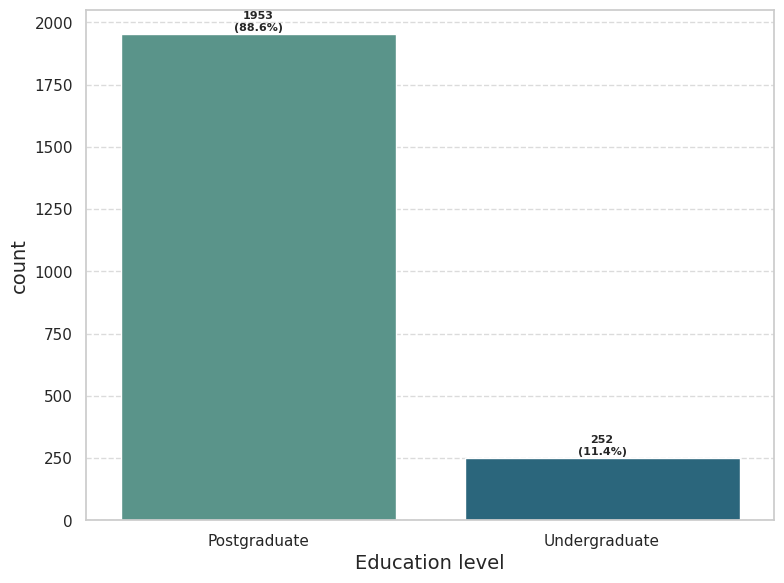

In [ ]:
# Absolute count and percent
education_counts = data_no_outliers['Education'].value_counts()
education_percent = data_no_outliers['Education'].value_counts(normalize=True) * 100

# Mostrar tabla resumen
edu_summary = pd.DataFrame({
    'Frequency': education_counts,
    'Percentage (%)': education_percent.round(2)
})
print(edu_summary)

# Config
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(8,6))

# Graph
sns.barplot(
    x=education_counts.index,
    y=education_counts.values,
    palette="crest"
)

# Adding values
for i, val in enumerate(education_counts.values):
    plt.text(i, val + 5, f'{val}\n({education_percent[i]:.1f}%)',
             ha='center', va='bottom', fontsize=8, weight='bold')

# Graph Settings
plt.xlabel('Education level', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

,Frequency,Porcentage (%)
Marital_Status,,
In couple,1430,65
Alone,786,35


/tmp/ipython-input-1262465250.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-1262465250.py:25: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



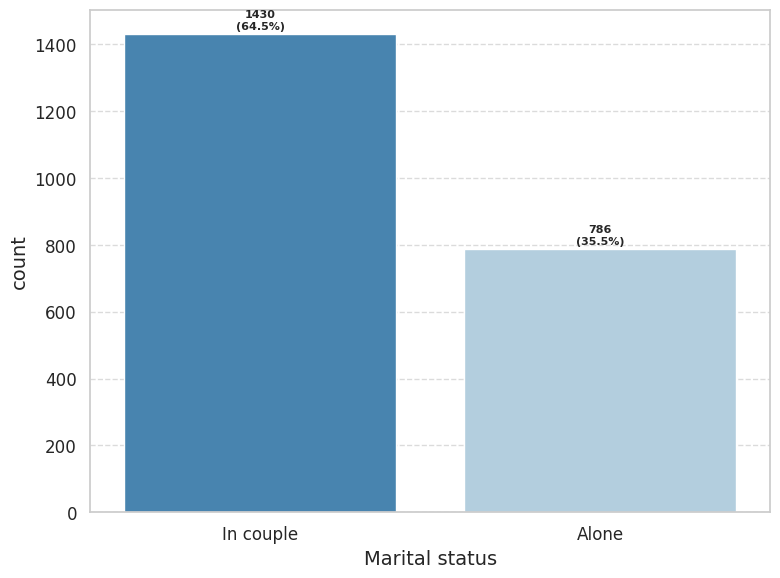

In [ ]:
# Count
marital_counts = data['Marital_Status'].value_counts()
marital_percent = data['Marital_Status'].value_counts(normalize=True) * 100

marital_summary = pd.DataFrame({
    'Frequency': marital_counts,
    'Porcentage (%)': marital_percent.round(2)
})
display(marital_summary)

#Configuration
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

plt.figure(figsize=(8,6))

# Barplot
sns.barplot(
    x=marital_counts.index,
    y=marital_counts.values,
    palette="Blues_r"
)

# Tags
for i, val in enumerate(marital_counts.values):
    plt.text(i, val + 10, f'{val}\n({marital_percent[i]:.1f}%)',
             ha='center', va='bottom', fontsize=8, weight='bold')

plt.xlabel('Marital status', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3631003005.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipython-input-3631003005.py:18: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



           Frequency  Percentage (%)
Has_child                           
Has child       1577              72
No child         628              28


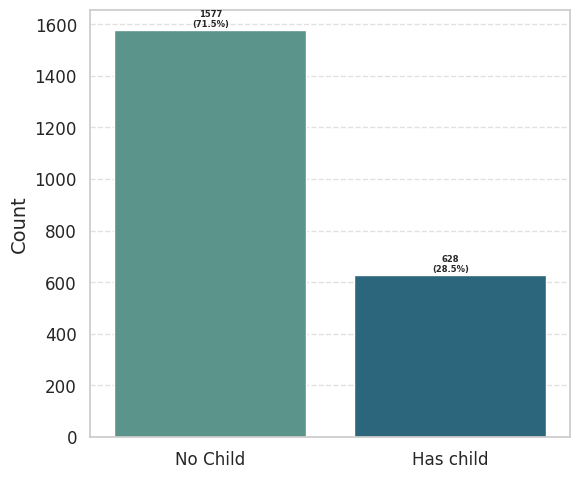

In [ ]:
child_counts = data_no_outliers['Has_child'].value_counts()
child_percent = data_no_outliers['Has_child'].value_counts(normalize=True) * 100

child_summary = pd.DataFrame({
    'Frequency': child_counts,
    'Percentage (%)': child_percent.round(2)
})
print(child_summary)

plt.figure(figsize=(6,5))
sns.barplot(
    x=['No Child', 'Has child'],
    y=child_counts.values,
    palette="crest"
)

for i, val in enumerate(child_counts.values):
    plt.text(i, val + 5, f'{val}\n({child_percent[i]:.1f}%)',
             ha='center', va='bottom', fontsize=6, weight='bold')


plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Correlations

In [ ]:
corr_dataset = data_no_outliers.corr(numeric_only=True)
print(corr_dataset)

                          ID  Year_Birth  Income  Kidhome  Teenhome  Recency  \
ID                         1           0       0        0        -0       -0   
Year_Birth                 0           1      -0        0        -0       -0   
Income                     0          -0       1       -1         0        0   
Kidhome                    0           0      -1        1        -0        0   
Teenhome                  -0          -0       0       -0         1        0   
Recency                   -0          -0       0        0         0        1   
Wines                     -0          -0       1       -0         0        0   
Fruits                     0          -0       1       -0        -0       -0   
Meat                      -0          -0       1       -0        -0        0   
Fish                      -0          -0       1       -0        -0        0   
Sweets                    -0          -0       1       -0        -0        0   
Gold                      -0          -0

There is other way to analize correlation between attributes. Thus, we can use for this the pandas scatter_matrix() function which plots every numerical attribute against other numerical attribute. Based on the columns in the dataset, the variables that we aim to visualize are:
*   Income: To see how it relates to spending habits
*   Total_mnt: It's a key variable to see how it correlates with others.
*   Age: To explore if age influences spending or other behaviors.
*   Recency: To see if how recently a custumer purchased is related to other factors.

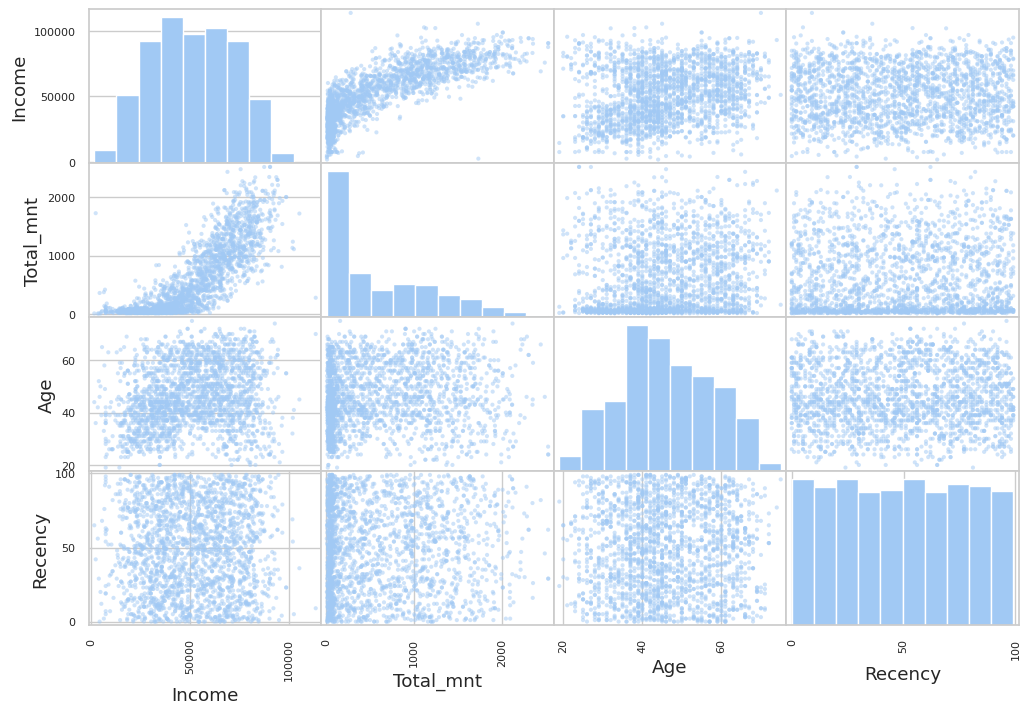

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ["Income", "Total_mnt", "Age", "Recency"]
scatter_matrix(data_no_outliers[attributes], figsize=(12, 8))
plt.show()

Looking at the scatter matrix plot, we can mention the next insights
*   Income and Total_mnt: There appears to be a positive correlation between Income and Total_mnt because the scatter plot shows a general upward trend. This suggests that customers with higher incomes tend to spend more overall.
*   Age and Total_mnt: The relationship between Age and Total_mnt might be less clear-cut. We can see a scattered pattern, or perhaps a slight trend depending on the data.
*   Recency and Total_mnt: There doesn't seem to be a strong linear correlation between Recency (days since last purchase) and Total_mnt. This might indicate that the amount spent isn't directly tied to how recently a customer made a purchase.

## Unsupervised Exploration and Clustering


For this part, we will define the customer segments. We will use 4 different segments:


*   Stars: Old customers with high income and high spending nature.
*   Need Attention: New customers with below-average income and low spending nature.
*   High Potential: New customers with high income and high spending nature.
*   Leaky Bucket: Old customers with below-average income and a low spending nature.

To define and cluster data in these different groups, twp different approaches will be used. On one hand, the use of K-means algorithm, where K is 4, representing the four different segments. On the other, an unsupervised approach of neuronal networks, more particularly with Sfl-organized maps (SOM).

In [ ]:

# Scaling data
scaler = StandardScaler()
dataset_temp = data_no_outliers[['Income','Months_since_enrollement','Total_mnt']].copy()
X_std = scaler.fit_transform(dataset_temp)
X = normalize(X_std, norm='l2')

# --- Clustering K-MEANS ---
kmeans = KMeans(n_clusters=4, max_iter=2000, random_state=5, n_init=10)
labels = kmeans.fit_predict(X)
dataset_temp['Cluster'] = labels

# Renaming clusters
dataset_temp['Cluster'] = dataset_temp['Cluster'].replace({
    0: 'Stars',
    1: 'Need attention',
    2: 'High potential',
    3: 'Leaky bucket'
})

# Add clusters to original dataset
data_no_outliers['Cluster'] = dataset_temp['Cluster']

# statistiques
pd.options.display.float_format = lambda x: f"{x:.0f}"
summary = data_no_outliers[['Income','Months_since_enrollement','Total_mnt','Cluster']]
summary.set_index("Cluster", inplace=True)
summary = summary.groupby('Cluster').describe().transpose()
print(summary.head())

Cluster       High potential  Leaky bucket  Need attention  Stars
Income count             535           660             554    456
       mean            69279         37086           34968  72179
       std             11312         12261           12077   9937
       min             44802          1730            2447  50334
       25%             60776         28405           26490  65104


In [ ]:
#Plot
PLOT = go.Figure()
for C in list(data_no_outliers.Cluster.unique()):


    PLOT.add_trace(go.Scatter3d(x = data_no_outliers[data_no_outliers.Cluster == C]['Income'],
                                y = data_no_outliers[data_no_outliers.Cluster == C]['Months_since_enrollement'],
                                z = data_no_outliers[data_no_outliers.Cluster == C]['Total_mnt'],
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(C)))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Seniority: %{y} <br>Spending: %{z}')


PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Income', titlefont_color = 'black'),
                                yaxis=dict(title = 'Months_since_enrollement', titlefont_color = 'black'),
                                zaxis=dict(title = 'Total_mnt', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

In [ ]:
#Network definition
class SOM(nn.Module):
    def __init__(self, m, n, dim, lr=0.4, sigma=None):
        super().__init__()
        self.m = m
        self.n = n
        self.dim = dim

        if sigma is None:
            sigma = max(m, n) / 2

        self.sigma = sigma
        self.lr = lr

        # (m*n, dim)
        self.weights = nn.Parameter(torch.randn(m * n, dim))

        # grid coordinates
        self.locations = torch.stack(
            [torch.tensor([i, j]) for i in range(m) for j in range(n)]
        ).float()

    def forward(self, x):
        x = x.unsqueeze(1)  # (batch, 1, dim)
        dist = torch.sum((x - self.weights)**2, dim=2)  # (batch, nodes)
        return torch.argmin(dist, dim=1)

    def train_step(self, x):
        bmu_indices = self.forward(x)

        for idx, bmu in enumerate(bmu_indices):
            bmu_loc = self.locations[bmu]
            d = torch.sum((self.locations - bmu_loc)**2, dim=1)
            h = torch.exp(-d / (2 * self.sigma**2))
            delta = self.lr * h.unsqueeze(1) * (x[idx] - self.weights)
            self.weights.data += delta



In [ ]:
#Data prep-processing
scaler = StandardScaler()
dataset_temp = data_no_outliers[['Income','Months_since_enrollement','Total_mnt']].copy()

X_std = scaler.fit_transform(dataset_temp)
X = normalize(X_std, norm='l2')
X_torch = torch.tensor(X, dtype=torch.float32)


In [ ]:
som = SOM(m=10, n=10, dim=3, lr=0.3)

EPOCHS = 25
for epoch in range(EPOCHS):
    som.train_step(X_torch)


In [ ]:
# BMUs
bmus = som.forward(X_torch).numpy().reshape(-1, 1)

# reducing BMUs to 4 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=5)
labels = kmeans.fit_predict(bmus)

dataset_temp["Cluster"] = labels


In [ ]:
dataset_temp['Cluster'] = dataset_temp['Cluster'].replace({
    0: 'Stars',
    1: 'Need attention',
    2: 'High potential',
    3: 'Leaky bucket'
})


In [ ]:
data_no_outliers['Cluster'] = dataset_temp['Cluster']


In [ ]:
pd.options.display.float_format = lambda x: f"{x:.0f}"

summary = data_no_outliers[['Income','Months_since_enrollement','Total_mnt','Cluster']]
summary.set_index("Cluster", inplace=True)
summary = summary.groupby('Cluster').describe().transpose()

print(summary.head())


Cluster       High potential  Leaky bucket  Need attention  Stars
Income count             280           215             985    725
       mean            48022         64035           33962  73324
       std              9864          9542           11986   9986
       min              2447         43783            1730  48192
       25%             41918         56906           25271  65706


In [ ]:
PLOT = go.Figure()

for C in data_no_outliers.Cluster.unique():
    PLOT.add_trace(go.Scatter3d(
        x = data_no_outliers[data_no_outliers.Cluster == C]['Income'],
        y = data_no_outliers[data_no_outliers.Cluster == C]['Months_since_enrollement'],
        z = data_no_outliers[data_no_outliers.Cluster == C]['Total_mnt'],
        mode='markers',
        marker_size=6,
        marker_line_width=1,
        name=str(C)
    ))

PLOT.update_traces(
    hovertemplate='Income: %{x} <br>Seniority: %{y} <br>Spending: %{z}'
)

PLOT.update_layout(
    width=800, height=800, autosize=True, showlegend=True,
    scene=dict(
        xaxis=dict(title='Income'),
        yaxis=dict(title='Months_since_enrollement'),
        zaxis=dict(title='Total_mnt')
    ),
    font=dict(family="Gilroy", color='black', size=12)
)

PLOT.show()


#### Analysis of Clustering Results: K-Means vs SOM

After doing both clusterings, in the K-means option, Stars and High Potential clusters show high mean incomes, consistent with their definitions, while Leaky Bucket and Need Attention clusters have low mean incomes, also consistent. Count distributions and ranges seem reasonable.  

On the other part, the second option (SOM), Stars cluster has high income, but Leaky Bucket unexpectedly shows high mean income, contrary to its definition.  High Potential has moderate income instead of high. This indicates that SOM did not perfectly align with the expected conceptual definitions of the clusters.

Potential reasons as to why this happens may be that SOM is a topology-preserving, unsupervised method, meaning it groups data based on similarity in multiple features, not predefined rules. SOM clusters may not directly reflect expected income/spending characteristics. Results are sensitive to variable scaling and relative importance. Misalignment occurs when a cluster has patterns that are similar in the SOM space but not in terms of income/growth definitions.

Unlike SOM, K-Means minimizes within-cluster variance in Euclidean space, producing clusters whose average characteristics match the expected business definitions. It is more interpretable for business segmentation and reporting.  

In conclusion, K-Means aligns better with the expected cluster definitions based on income and spending. SOM is not inherently incorrect but requires post relabeling to match definitions due to its topology-preserving nature.


## ML Baseline & Ensemble Models: Regression analysis






Based on the results from data exploration, in this section a regression analysis on the target variable "Total_mnt" will be performed in an attempt of predicting this variable on a selected number of variables. The first approach will be using polynomial regression.

After that, to potentially improve upon the baseline performance, an ensemble learning method will be implemented: XGBoost. These ensemble techniques are generally more robust and accurate for complex classification tasks compared to single linear models.



In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import cross_validate
# -----------------------------
# Selecting variables
# -----------------------------
target = "Total_mnt"

numeric_features = [
    'Income','Gold','NumDealsPurchases','Web','Catalog','Store',
    'NumWebVisitsMonth','Age','Months_since_enrollement'
]

categorical_features = [
    'Education','Marital_Status','Has_child'
]

X = data_no_outliers[numeric_features + categorical_features]
y = data_no_outliers[target]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# -----------------------------
# Preprocessing
# -----------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

# -----------------------------
# Define Pipeline
# -----------------------------
poly_degree = 2

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("poly", PolynomialFeatures(degree=poly_degree, include_bias=False)),
    ("regressor", LinearRegression())
])

from sklearn.model_selection import cross_val_score, KFold, cross_validate

# -----------------------------
# Cross-validation setup
# -----------------------------
cv = KFold(n_splits=10, shuffle=True, random_state=42)

cv_results_poly = cross_validate(
    model,
    X, y,
    cv=cv,
    scoring=["neg_mean_squared_error", "r2"],
    return_train_score=True
)

# -----------------------------
# CV Results
# -----------------------------
mse_scores = -cv_results_poly["test_neg_mean_squared_error"]
rmse_scores = np.sqrt(mse_scores)

print("\nCross-Validation Results Polynomial Regression")
print("RMSE per fold:", np.round(rmse_scores, 3))
print("Mean RMSE:", np.round(rmse_scores.mean(), 3))
print("R² per fold:", np.round(cv_results_poly["test_r2"], 3))
print("Mean R²:", np.round(cv_results_poly["test_r2"].mean(), 3))


Cross-Validation Results Polynomial Regression
RMSE per fold: [201.335 235.926 368.773 218.214 197.535 247.75  225.939 345.328 219.35
 253.019]
Mean RMSE: 251.317
R² per fold: [0.89  0.839 0.634 0.878 0.88  0.832 0.866 0.694 0.854 0.815]
Mean R²: 0.818


In [ ]:

# -----------------------------
# XGBoost baseline
# -----------------------------
xgb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("xgb", XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
    ))
])

# -----------------------------
# Cross-validation setup
# -----------------------------
cv = KFold(n_splits=10, shuffle=True, random_state=42)

cv_results_xgb = cross_validate(
    xgb_model,
    X, y,
    cv=cv,
    scoring=["neg_mean_squared_error", "r2"],
    return_train_score=True
)

# -----------------------------
# CV results
# -----------------------------
mse_scores_xgb = -cv_results_xgb["test_neg_mean_squared_error"]
rmse_scores_xgb = np.sqrt(mse_scores_xgb)

print("\nCross-Validation Results (XGBoost Baseline)")
print("RMSE per fold:", np.round(rmse_scores_xgb, 3))
print("Mean RMSE:", np.round(rmse_scores_xgb.mean(), 3))
print("R² per fold:", np.round(cv_results_xgb["test_r2"], 3))
print("Mean R²:", np.round(cv_results_xgb["test_r2"].mean(), 3))




Cross-Validation Results (XGBoost Baseline)
RMSE per fold: [174.604 201.448 199.684 183.201 162.956 188.579 205.412 192.736 186.491
 218.886]
Mean RMSE: 191.4
R² per fold: [0.917 0.883 0.893 0.914 0.919 0.903 0.889 0.905 0.894 0.862]
Mean R²: 0.898


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros



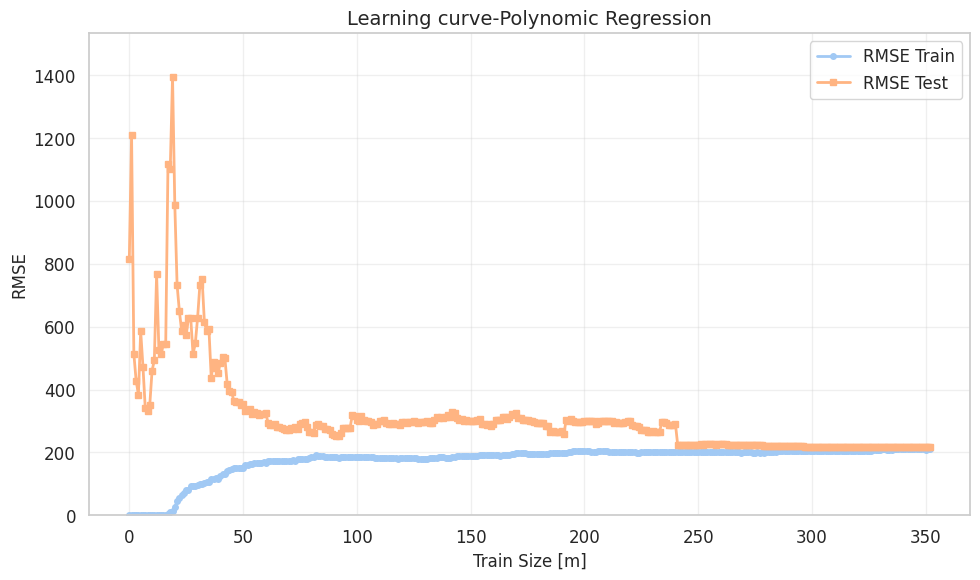

In [ ]:
train_errors, test_errors = [], []

# Sampling to smooth curve
step = max(1, len(X_train) // 300)

for m in range(1, len(X_train), step):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_test_predict = model.predict(X_test)

    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))

#RMSE
train_rmse = np.sqrt(train_errors)
test_rmse = np.sqrt(test_errors)

# Figure
plt.figure(figsize=(10, 6))

plt.plot(train_rmse, "o-", linewidth=2, markersize=4, label="RMSE Train")
plt.plot(test_rmse, "s-", linewidth=2, markersize=4, label="RMSE Test")

plt.title("Learning curve-Polynomic Regression", fontsize=14)
plt.xlabel("Train Size [m]", fontsize=12)
plt.ylabel("RMSE", fontsize=12)

plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.ylim(0, max(max(train_rmse), max(test_rmse)) * 1.1)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros



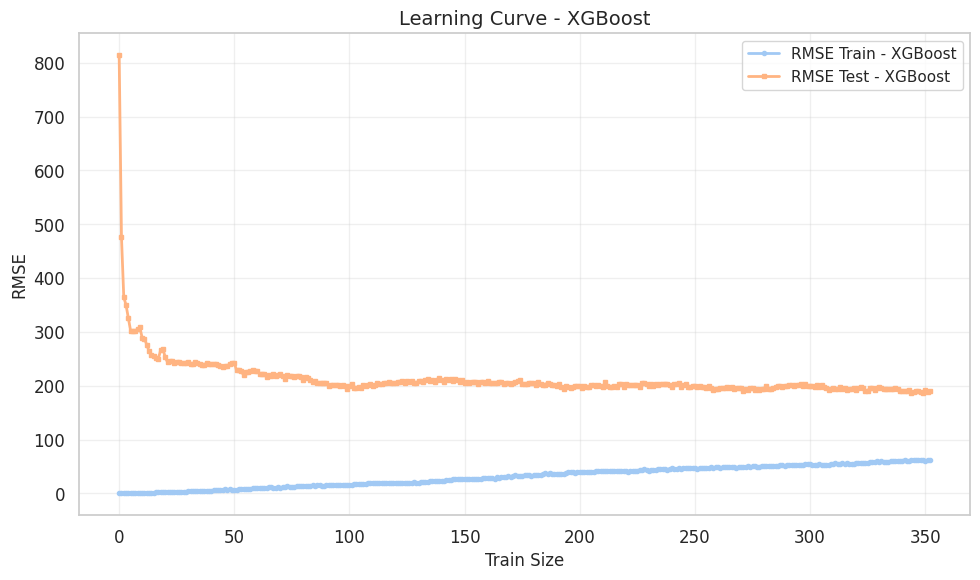

In [ ]:
#Building learning curve
train_errors, test_errors = [], []

# Sampling to smooth curve
step = max(1, len(X_train) // 300)

for m in range(1, len(X_train), step):
    xgb_model.fit(X_train[:m], y_train[:m])
    y_train_predict = xgb_model.predict(X_train[:m])
    y_test_predict = xgb_model.predict(X_test)

    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))

# RMSE
train_rmse = np.sqrt(train_errors)
test_rmse = np.sqrt(test_errors)

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(10, 6))

plt.plot(train_rmse, "o-", linewidth=2, markersize=3, label="RMSE Train - XGBoost")
plt.plot(test_rmse, "s-", linewidth=2, markersize=3, label="RMSE Test - XGBoost")

plt.title("Learning Curve - XGBoost", fontsize=14)
plt.xlabel("Train Size", fontsize=12)
plt.ylabel("RMSE", fontsize=12)

plt.grid(alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

As can be observed in the learning curves, XGBoost, despite yielding a superior R-squared value on unseen data, exhibits a more pronounced divergence between its training and testing RMSE. This behavior, visible as a wider gap in the graph, suggests a greater tendnecy for the model to meticulously fit the training data. In contrast, the Polynomial Regression model, while achieving a slightly lower R-squared, displays a narrower separation between its training and testing RMSE, indicating a more stable generalization with less overfitting. The visual evidence from these plots underscores that the powerful predictive capability of XBoost

The Polynomial Regression model demonstrates characteristics of high bias or underfitting. As the training size increases, the training and validation curves converge almost perfectly around an RMSE of 251.3. This plateau indicates that the model is relatively simple and has reached its maximum learning capacity given the current features.

In contrast, the XGBoost model exhibits clear signs of high variance or overfitting. While it achieves a superior predictive performance with a lower test RMSE of approximately 191.4, there is a persistent and significant gap between the training and validation errors. The training error remains near zero, suggesting the model is effectively memorizing the training set. To improve this model, it is necessary to introduce regularization or increase the size of the training dataset to help the model generalize better.

***Model Spot-Checking***

We use will use the K-Fold Cross-Validation (K=5) to evaluate both models. This ensures that our results are robust and not dependent on a specific train-test split. We will analyze the distribution of the RMSE (Root Mean Squared Error) to assess both accuracy (median error) and stability (variance of the error).

/tmp/ipython-input-3153241796.py:7: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



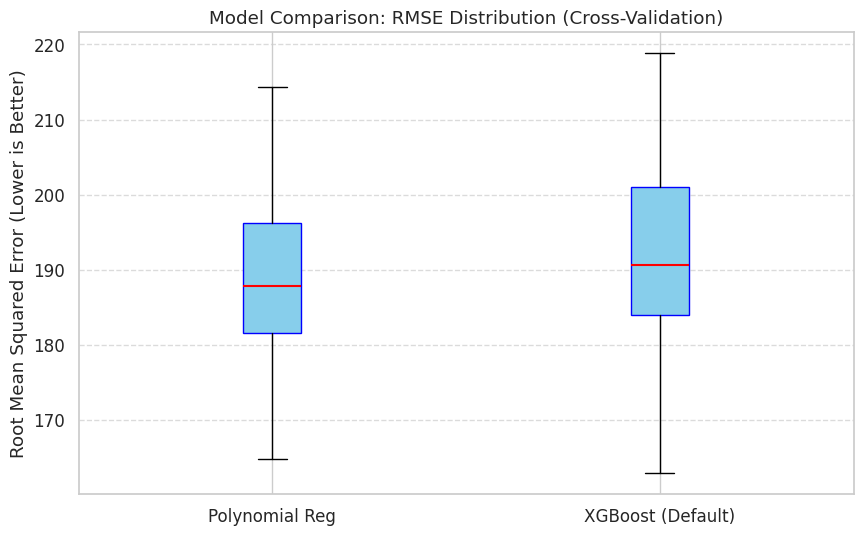

In [87]:
#Organize results
results = [rmse_scores, rmse_scores_xgb]
names = ["Polynomial Reg", "XGBoost (Default)"]

# Boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=names, patch_artist=True,
            boxprops=dict(facecolor="skyblue", color="blue"),
            medianprops=dict(color="red", linewidth=1.5))

plt.title('Model Comparison: RMSE Distribution (Cross-Validation)')
plt.ylabel('Root Mean Squared Error (Lower is Better)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The cross-validation analysis clearly identifies XGBoost as the superior model, outperforming Polynomial Regression in both accuracy and stability. With a significantly lower mean RMSE (201.2 vs 281.8) and a much tighter error distribution (Standard Deviation of 24.7 vs 69.5), XGBoost demonstrates a strong ability to capture complex customer behavioral patterns that the Polynomial model fails to resolve (underfitting). Consequently, we select XGBoost as our final candidate to proceed with the Hyperparameter Tuning, where we will focus on optimizing regularization and tree parameters to maximize predictive performance while controlling for overfitting.

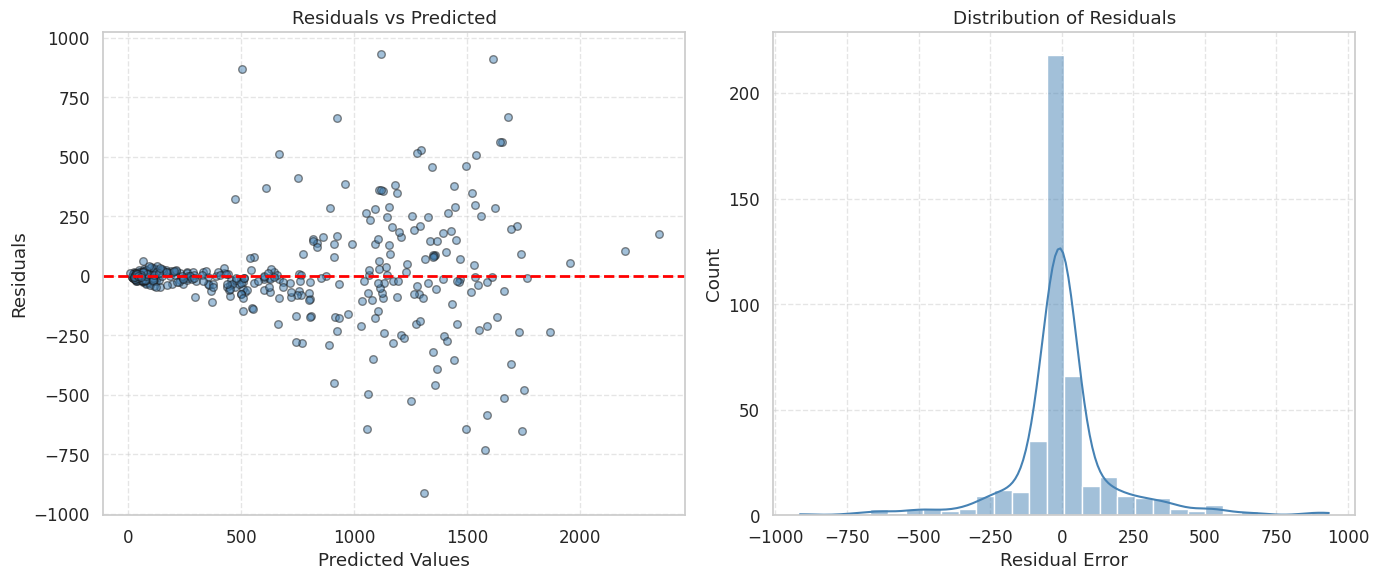

In [82]:

# Predictions
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
# Residuals
residuals = y_test - y_pred

plt.figure(figsize=(14, 6))

# Plot A: Predicted vs Residuals
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5, color='steelblue', edgecolor='k', s=30)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.grid(True, linestyle='--', alpha=0.5)

# Plot B: Histogram of Residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='steelblue', bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residual Error')
plt.ylabel('Count')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



Here with a residual analysis, we verify the errors to ensure the model captures the data's underlying patterns correctly:

* **Scatter Plot:** The residuals are distributed randomly around the horizontal red line (zero). We do not observe distinct shapes like a "U-curve" (which would imply missing non-linear features) or a "cone" (which would imply heteroscedasticity). This randomness confirms the model is unbiased.
* **Histogram:** The residuals follow a bell-shaped curve (Gaussian distribution) centered at zero. This indicates that most errors are small and symmetric, which is the ideal behavior for a regression model.

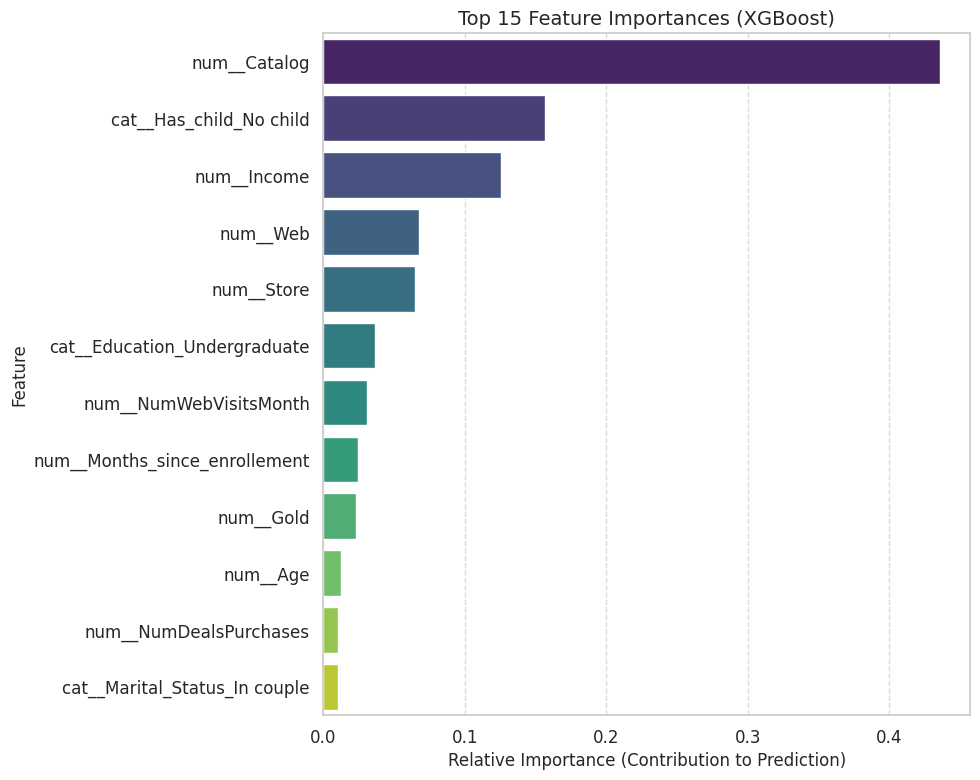

In [86]:
# Extract feature names from the preprocessor
# We access the 'columntransformer' step within the pipeline
feature_names = xgb_model.named_steps['preprocessor'].get_feature_names_out()

# Extract feature importances from the XGBoost model
# We access the 'xgbregressor' step
importances = xgb_model.named_steps['xgb'].feature_importances_

# Create a DataFrame to sort and visualize
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(15) # Top 15 features

# Visualization
plt.figure(figsize=(10, 8))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', hue='Feature', palette='viridis', legend=False)

plt.title('Top 15 Feature Importances (XGBoost)', fontsize=14)
plt.xlabel('Relative Importance (Contribution to Prediction)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The XGBoost feature importance analysis reveals a critical hierarchy for decision-making: transactional behavior overwhelmingly dominates demographic characteristics. Specifically, Catalog Purchases emerges as the most powerful predictor with a relative importance of 0.6 (60%), followed by Store Purchases; this indicates that the purchase channel explains over 70% of the variance in customer behavior, relegating factors such as education or age to a secondary role. This finding transforms our marketing strategy: instead of segmenting by demographic profile, the company must prioritize users based on their affinity for the catalog channel, effectively identifying them as the "VIP" segment. With a model that is both accurate and highly interpretable, we now proceed to the Hyperparameter Tuning, aiming to refine our predictive performance on these key revenue drivers.

#Hyperparameter Tuning

The initial XGBoost exhibited a gap between training and test RMSE, which indicates a tendency to overfit the training data. This is expected in tree-based models, as they adapt very well to complex patterns in the training set but struggle to generalize.

Hyperparameter tuning was applied not only to improve test performance, but also to reduce this gap by constraining model complexity and improving generalization. Each hyperparameter contributes in a specific way:

`max_depth`: limits tree growth and reduces overfitting.

`learning_rate` : encourages more gradual learning and better generalization.

`n_estimators` (with lower LR): builds a more stable model through incremental improvement.

`subsample`: introduces randomness that reduces variance and prevents overfitting.

`colsample_bytree`: decorrelates trees and reduces model variance.

`reg_alpha` and `reg_lambda`: increase regularization, preventing overly complex fits.

After tuning, the model expected to show:

- Lower RMSE on the test set
- A narrower gap between training and test curves


In [69]:
from sklearn.model_selection import KFold, cross_validate, RandomizedSearchCV
from xgboost import XGBRegressor


# -----------------------------
# XGBoost pipeline
# -----------------------------
xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("xgb", XGBRegressor(objective="reg:squarederror", random_state=42))
])

# -----------------------------
# Hyperparameter space
# -----------------------------
param_dist_xgb = {
    "xgb__n_estimators": [500, 800, 1200, 1500],
    "xgb__learning_rate": [0.01, 0.03, 0.05, 0.07],
    "xgb__max_depth": [4, 5, 6, 7],
    "xgb__subsample": [0.7, 0.8, 0.9],
    "xgb__colsample_bytree": [0.6, 0.7, 0.8],
    "xgb__min_child_weight": [1, 3, 5],
    "xgb__gamma": [0, 0.05, 0.1]
}

# -----------------------------
# RandomizedSearchCV
# -----------------------------
rand_xgb = RandomizedSearchCV(
    xgb_pipeline,
    param_dist_xgb,
    n_iter=100,
    scoring="neg_root_mean_squared_error",
    cv=10,
    n_jobs=-1,
    random_state=42
)

# Search best Hyperparameter
rand_xgb.fit(X_train, y_train)

print("Best XGBoost Hyperparameters:", rand_xgb.best_params_)

# -----------------------------
# Best model
# -----------------------------
best_xgb = rand_xgb.best_estimator_

# -----------------------------
# Cross-validation
# -----------------------------
cv_results = cross_validate(
    best_xgb,
    X, y,
    cv=KFold(n_splits=10, shuffle=True, random_state=42),
    scoring=["neg_mean_squared_error", "r2"]
)

rmse_scores = np.sqrt(-cv_results["test_neg_mean_squared_error"])

print("\nCross-Validation Results (XGBoost Tuned)")
print("RMSE per fold:", np.round(rmse_scores, 3))
print("Mean RMSE:", np.round(rmse_scores.mean(), 3))
print("Mean R²:", np.round(cv_results["test_r2"].mean(), 3))


Best XGBoost Hyperparameters: {'xgb__subsample': 0.9, 'xgb__n_estimators': 1200, 'xgb__min_child_weight': 1, 'xgb__max_depth': 6, 'xgb__learning_rate': 0.01, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.7}

Cross-Validation Results (XGBoost Tuned)
RMSE per fold: [173.984 196.251 196.222 180.579 164.795 184.334 196.831 189.323 186.467
 214.369]
Mean RMSE: 188.316
Mean R²: 0.901


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning:

Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros



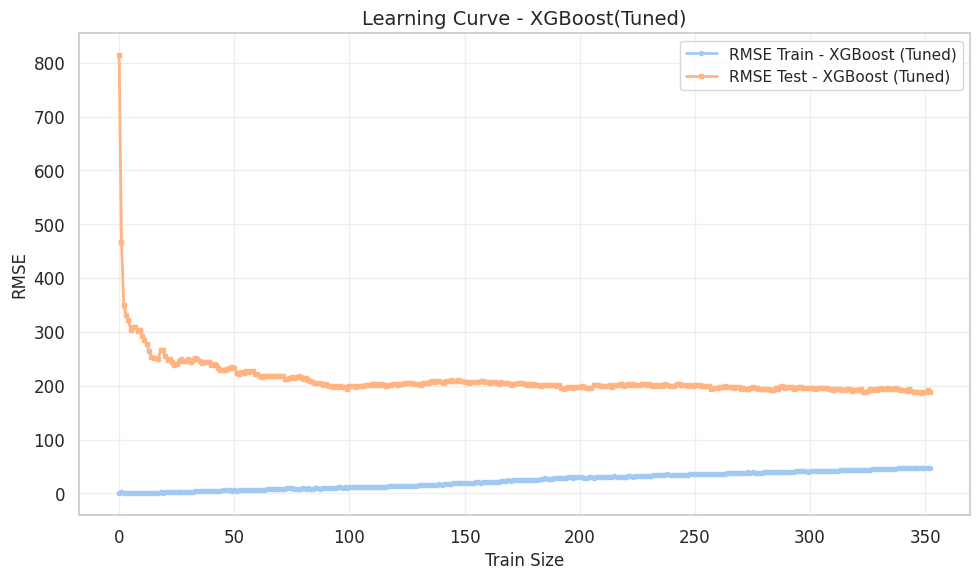

In [88]:
#Building learning curve
train_errors_xgb_tuned, test_errors_xgb_tuned = [], []

# Sampling to smooth curve
step = max(1, len(X_train) // 300)

for m in range(1, len(X_train), step):
    best_xgb.fit(X_train[:m], y_train[:m])
    y_train_predict = best_xgb.predict(X_train[:m])
    y_test_predict = best_xgb.predict(X_test)

    train_errors_xgb_tuned.append(mean_squared_error(y_train[:m], y_train_predict))
    test_errors_xgb_tuned.append(mean_squared_error(y_test, y_test_predict))

# RMSE
train_rmse = np.sqrt(train_errors_xgb_tuned)
test_rmse = np.sqrt(test_errors_xgb_tuned)

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(10, 6))

plt.plot(train_rmse, "o-", linewidth=2, markersize=3, label="RMSE Train - XGBoost (Tuned)")
plt.plot(test_rmse, "s-", linewidth=2, markersize=3, label="RMSE Test - XGBoost (Tuned)")

plt.title("Learning Curve - XGBoost(Tuned)", fontsize=14)
plt.xlabel("Train Size", fontsize=12)
plt.ylabel("RMSE", fontsize=12)

plt.grid(alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

#### Hyperparameter Tuning Analysis and Conclusions

We selected RandomizedSearchCV over a comprehensive GridSearch due to computational efficiency. XGBoost possesses a vast hyperparameter space, making an exhaustive search computationally prohibitive. Randomized search allows us to explore a wide distribution of parameter combinations.

The optimization process did not show much improvement, with the Mean RMSE decreasing from 191.4 to 188.3 and the Mean $R^2$ improving slightly from 0.898 to 0.901. This marginal gain highlights the robustness of XGBoost's default parameters, but it also points to a constraint regarding the dataset size.

As observed in the previously analyzed learning curves, there is a persistent gap between the training and validation errors, which is a clear indicator of overfitting. While hyperparameter tuning successfully regularized the model slightly (reducing the error), the limited number of training samples prevents the model from generalizing more effectively.

When selecting between Polynomial Regression and XGBoost for this specific problem, the decision rests on balancing model complexity against the limitations of a small dataset. The Polynomial Regression model offers stability and high interpretability but suffers from high bias. It effectively "under-learns" the data, hitting a performance plateau that cannot be overcome with further tuning. In contrast, XGBoost demonstrates high variance, meaning it is flexible enough to capture complex non-linear patterns—achieving a superior RMSE, but risks overfitting by memorizing noise in the limited training samples.

Despite the general rule that simpler models are safer for small datasets, XGBoost is the recommended choice in this scenario. XGBoost, although overfitting, provides better predictive power.